<a href="https://colab.research.google.com/github/ashraf336/Image-Segmentation/blob/master/PR_Ass_2_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# clone the git hub 
# to add the dataset in the 
#VR files
!git clone https://github.com/osamasherif22/Image-Segmentation

fatal: destination path 'Image-Segmentation' already exists and is not an empty directory.


In [36]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow
from scipy import io
import scipy
import imageio

# KMEANS

In [37]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        #centroids[i][0] = new_centroid_sum_x/float(j+1)
        #centroids[i][1] = new_centroid_sum_y/float(j+1)
        centroids[i][0] = new_centroid_sum_x/float(len(centroids))
        centroids[i][1] = new_centroid_sum_y/float(len(centroids))
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    # print("ok")
    # centroids = []
    # while(len(centroids)!=k):
    #     cent = items[random.sample(range(0, len(items)), k)]
    #     if(len(centroids)>=1):
    #         if(cent not in centroids):
    #             centroids.append(cent)
    #         else:
    #             centroids.append(cent)
    # print("Initial centroids are {}".format(centroids))
    # return cent

     centroids = [[0 for i in range(len(items[0]))] for j in range(k)] #Init centroids array
     centroids = np.array(centroids)
     #randomIndexes = random.sample(range(0, len(items)), k)
     centroids = random.sample(list(items), k)

     # for i in range(len(randomIndexes)):
     #   #print(centroids.shape)
     #   #print(items.shape)
     #   centroids[i] = items[randomIndexes[i]]
     return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)
  #  print("CENTROIDS",centroids)
    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      #print("old centroids  = ", old_centroids)
      #print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        #for j in item_index_array:
          
          #plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()

   #   print("CLUSTERS ---------------------------------",clusters_data)
      return clusters_data

# Load the data set and Display func

In [38]:
def get_sorted_list_filenm(path,ext):
  # Get list of all files in a given directory sorted by name
  sorted_list_of_files = sorted( filter( os.path.isfile,
                          glob(path + ext) ) )
  return sorted_list_of_files

In [39]:
# Read all the jpg image in directory
def load_image(image_path):
    arr_imgs=[]
    original_imgs = []
    files_name_sorted=get_sorted_list_filenm(image_path,"/*jpg")
    for file in files_name_sorted:
        pic = cv2.imread(file).astype(np.float32)
        pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        shape = pic.shape
        original_imgs.append(pic)
        arr_imgs.append(np.float32(pic.reshape(-1, pic.shape[-1])))
    arr_imgs = np.array(arr_imgs) # Convert to np array
    display_img(arr_imgs[0],original_imgs[0])
    return arr_imgs,original_imgs

In [40]:
# display Ground truth imge
def display_GT (image):
  # Output img with window name as 'image'
  cv2_imshow(image)  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)

# display imges 
def display_img (image,origin_img):
  # Output img with window name as 'image'
  cv2_imshow(image.reshape(origin_img.shape))  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)      

In [41]:
# Read Ground truth files
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'

def load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr):
  PATH = os.path.join(root,'data/groundTruth')
  for sub_dir_name in ['train/','test/','val/']:
      temp_arr=[]
      sub_pth = os.path.join(PATH,sub_dir_name)
      ##Create a new folder for the generated pictures to save
      save_pth = os.path.join(root,'data/GT_convert',sub_dir_name)
      os.makedirs(save_pth,exist_ok=True)
      print('Start conversion: '+sub_dir_name)
      sorted_sub_pth=get_sorted_list_filenm(sub_pth,"/*mat")
      for filename in sorted_sub_pth:
          # Read all data in the mat file
          #mat file contains data stored in dictionary form
          #Include dict_keys(['__globals__','groundTruth','__header__','__version__'])
          #If you want to use the contour in'groundTruth']
          #x['groundTruth'][0][0][0][0][1] is the outline
          #x['groundTruth'][0][0][0][0][0] is the segmentation map
          data = io.loadmat(os.path.join(sub_pth,filename))
          edge_data = data['groundTruth'][0][0][0][0][0]
          #Store the normalized data: 0<x<1
          #So need to restore back to 0<x<255
          #edge_data_255 = edge_data * 255
          temp_arr.append(edge_data)
          #new_img_name = filename.split('.')[0]+'.jpg'
          #print(new_img_name)
          #imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture
      if (sub_dir_name=='train/' ):
        groundtrain_arr= temp_arr.copy()
        print("#################\nstored in train \n############")
      elif (sub_dir_name=='test/' ):
        groundtest_arr= temp_arr.copy()
        print("#################\nstored in test \n############")
      else:
        groundval_arr= temp_arr.copy()
        print("#################\nstored in val  \n############")

  return (groundtest_arr,groundtrain_arr,groundval_arr)



# MAIN CALLS

**read the data set**

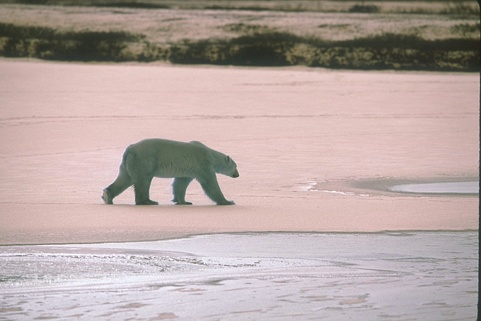

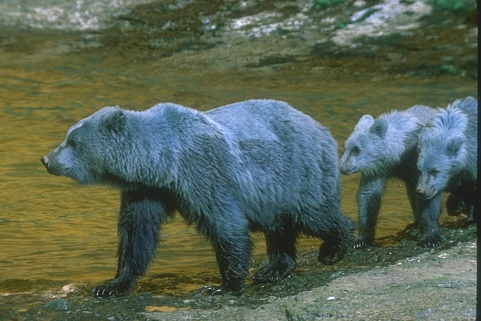

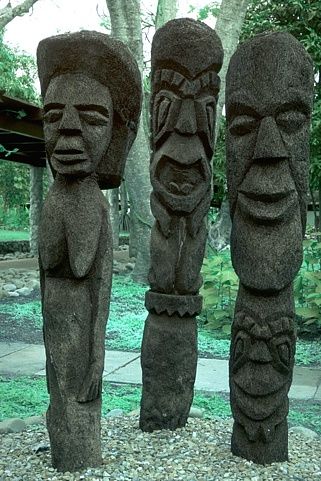

In [42]:
base='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/'
print("######  Samples from each category in the dataset : ########")
#load test data set
test_imgs,test_imgs_origin=load_image(base+'test/')

#load train data set
train_imgs,train_imgs_origin=load_image(base+'train/')


#load val data set
val_imgs,val_imgs_origin=load_image(base+'val/')

In [43]:
#load Ground truth data
groundtest_arr=[]
groundtrain_arr=[]
groundval_arr=[]
groundtest_arr,groundtrain_arr,groundval_arr=load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr)

Start conversion: train/
#################
stored in train 
############
Start conversion: test/
#################
stored in test 
############
Start conversion: val/
#################
stored in val  
############


**Q2. Visualize the image and the ground truth segmentation**

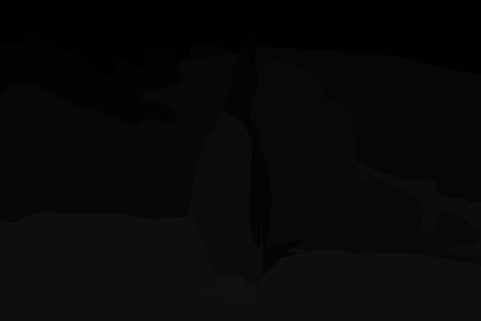

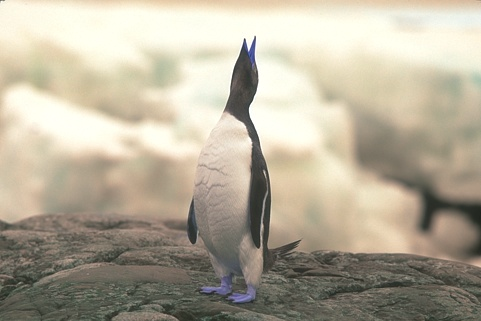

In [44]:
display_GT(np.array(groundval_arr[5]))

display_img(val_imgs[5],val_imgs_origin[5])

**Display mat file**

In [49]:
np.set_printoptions(threshold=100)
#np.set_printoptions(threshold=sys.maxsize)
root ='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/groundTruth/'
file_name='train/100075.mat'
# read a file 
x=io.loadmat(root+file_name)

#print("\nground truth\n",x['groundTruth'][0][0][0][0][1])

print("\n Segmentation\n",x['groundTruth'][0][0][0][0][0])

print(x.keys())


 Segmentation
 [[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [11 11 11 ... 14 14 14]
 [11 11 11 ... 14 14 14]
 [11 11 11 ... 14 14 14]]
dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])


**Built in k-means**

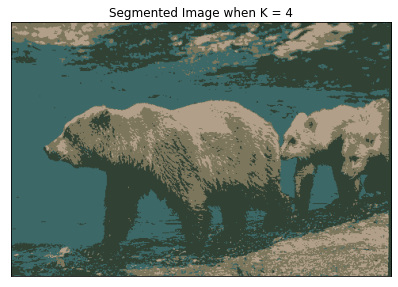

In [46]:
sample_image_builtin = train_imgs[0]
sample_image_builtin_origin  =train_imgs_origin[0]
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=10
ret,label,center=cv2.kmeans(sample_image_builtin,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape(sample_image_builtin_origin.shape)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


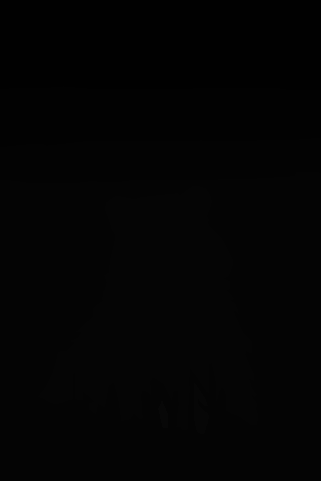

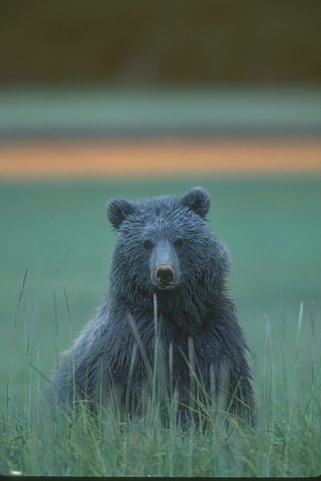

In [47]:
sample_no = 1

sample_image = train_imgs[sample_no]
sample_image_origin  =train_imgs_origin[sample_no]
sample_segmentation= groundtrain_arr[sample_no]


display_GT(np.array(sample_segmentation))

display_img(sample_image,sample_image_origin)


**Apply our K means**

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


#### shape  (154401, 1)
##########  y pred (154401,)
############## y true  (154401,)
###########  y pred 
  [0. 0. 0. ... 0. 0. 0.]
########### y true  
 [1 1 1 ... 4 4 4]
 Fl score =  0.09360604616826824
 conditional entropy score =  0.4397789597540479


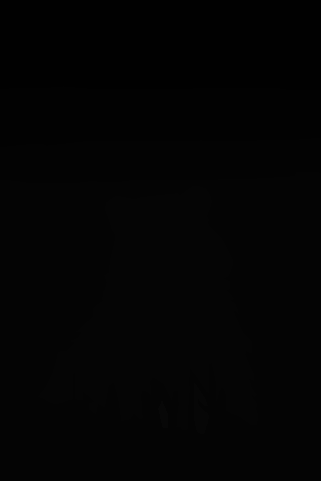

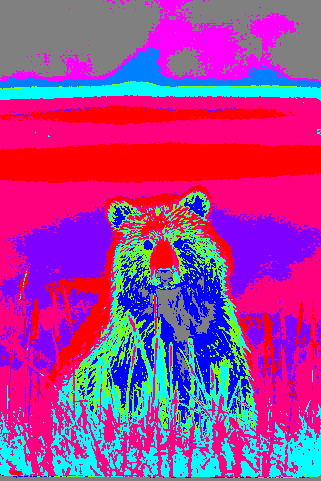

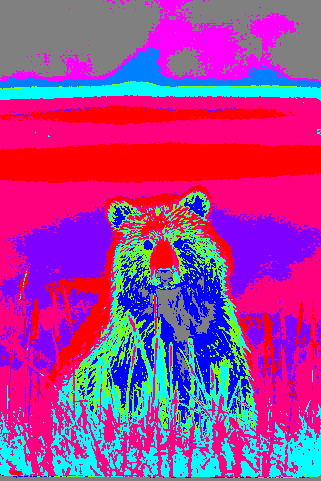

(9,)
20541
16919
7032
21203
7688
18482
3398
10041
49097


In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import v_measure_score



clusters_data = KMeans(9,sample_image) #00
clusters_data = np.array(clusters_data)
#sample_image_abdo = train_imgs[11] ##
#sample_image_abdo_shape = train_imgs_origin[11] ##
grey = [128 ,128, 128]
pink = [255, 0 ,127]
viola = [255, 0 ,255]
blue = [0, 0 ,255]
green = [0, 255 ,127]
yellow = [255, 255, 0]
orange = [255, 128, 0]
red = [255, 0, 0]
purple = [127, 0 ,255]
palette = [grey ,pink, viola ,blue ,green ,yellow, orange ,red ,purple]


#deleting the first two columns of each index
kkkk =  np.delete(sample_image, 2, 1)
new =  np.delete(kkkk, 1, 1)



print("#### shape ",new.shape) 



for i in range(len(clusters_data)):
  for j in range(len(clusters_data[i])):
    index = clusters_data[i][j]
    new[index] = i



y_true= np.array(sample_segmentation).flatten()
y_pred= np.array(new).flatten()

print("##########  y pred", y_pred.shape)
print("############## y true ",y_true.shape)


print("###########  y pred \n ", y_pred )
print("########### y true  \n", y_true )


f1= f1_score(y_true, y_pred, average='weighted')
print(" Fl score = ",f1)


entropy=v_measure_score(y_true,y_pred )
print(" conditional entropy score = ",entropy)

for i in range(len(clusters_data)):
  for j in range(len(clusters_data[i])):
    index = clusters_data[i][j]
    sample_image [index] = palette[i]




display_GT(np.array(sample_segmentation))

display_img(sample_image,sample_image_origin)


    
#print(sample_image )
cv2_imshow(sample_image.reshape(sample_image_origin.shape)) 
print(clusters_data.shape)
print(len(clusters_data[0]))
print(len(clusters_data[1]))
print(len(clusters_data[2]))
print(len(clusters_data[3]))
print(len(clusters_data[4]))
print(len(clusters_data[5]))
print(len(clusters_data[6]))
print(len(clusters_data[7]))
print(len(clusters_data[8]))
